## Train model

In [1]:
from csv import reader

def load_csv() -> list:
    dataset = []
    with open('data.csv', 'r') as file:
        csv_reader = reader(file)
        next(csv_reader)
        for row in csv_reader:
            dataset.append([float(row[0]), float(row[1])])
    return dataset

def normalize_dataset(dataset) -> list:
    minmax = []
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return minmax

In [2]:
def coefficients(dataset, l_rate, n_epoch) -> list:
    theta = [0.0, 0.0]
    sum_error = 0
    for epoch in range(n_epoch):
        stop_error = sum_error
        sum_error = 0
        for row in dataset:
            pred_y = theta[0] + theta[1] * row[0]
            error = pred_y - row[1]
            sum_error += error**2
            theta[0] -= l_rate * error
            theta[1] -= l_rate * error * row[0]
        # print('>epoch=%d, lrate=%.3f, error=%.3f, stop_error=%.3f' % (epoch, l_rate, sum_error, stop_error))
        if epoch != 0 and round((stop_error - sum_error), 8) < 0.00000001:
            return theta
    return theta

def scaler(theta) -> list:
    theta1 = theta[1] * (minmax[1][1] - minmax[1][0]) / (minmax[0][1] - minmax[0][0])
    theta0 = theta1 * (1 - minmax[0][0]) + (minmax[1][1] - minmax[1][0]) * theta[0] + minmax[1][0]
    return [theta0, theta1]

In [3]:
l_rate = 0.01
n_epoch = 5000
dataset = load_csv()
minmax = normalize_dataset(dataset)
theta0, theta1 = scaler(coefficients(dataset, l_rate, n_epoch))
print('Coefficients: theta0 = %.3f\n              theta1 = %.3f' % (theta0, theta1))

Coefficients: theta0 = 8519.755
              theta1 = -0.021


## Set coefficents to zero

In [5]:
theta0, theta1 = 0, 0
print('Coefficients: theta0 = %.f\n              theta1 = %.f' % (theta0, theta1))

## Predict from input

In [4]:
x_pred = int(input('input km for predict price: '))
y_pred = theta0 + theta1 * x_pred

print('Mileage = %.13g\nPrice prediction = %.3f' % (x_pred, y_pred))
if x_pred < 0 or y_pred < 0:
    print("Sry, my answer is lie")

Mileage = 150000
Price prediction = 5309.582


## Predict price from data.csv

In [5]:
from numpy import diff

for row in load_csv():
    pred_x = row[0]
    pred_y = theta0 + theta1 * pred_x
    print('Km = %.13g, Price = %.3f, Price prediction = %.3f, diff = %.3f' % (pred_x, row[1], pred_y, diff([row[1], pred_y])))

Km = 240000, Price = 3650.000, Price prediction = 3383.478, diff = -266.522
Km = 139800, Price = 3800.000, Price prediction = 5527.873, diff = 1727.873
Km = 150500, Price = 4400.000, Price prediction = 5298.881, diff = 898.881
Km = 185530, Price = 4450.000, Price prediction = 4549.199, diff = 99.199
Km = 176000, Price = 5250.000, Price prediction = 4753.152, diff = -496.848
Km = 114800, Price = 5350.000, Price prediction = 6062.902, diff = 712.902
Km = 166800, Price = 5800.000, Price prediction = 4950.042, diff = -849.958
Km = 89000, Price = 5990.000, Price prediction = 6615.052, diff = 625.052
Km = 144500, Price = 5999.000, Price prediction = 5427.288, diff = -571.712
Km = 84000, Price = 6200.000, Price prediction = 6722.058, diff = 522.058
Km = 82029, Price = 6390.000, Price prediction = 6764.239, diff = 374.239
Km = 63060, Price = 6390.000, Price prediction = 7170.198, diff = 780.198
Km = 74000, Price = 6600.000, Price prediction = 6936.069, diff = 336.069
Km = 97500, Price = 6800.0

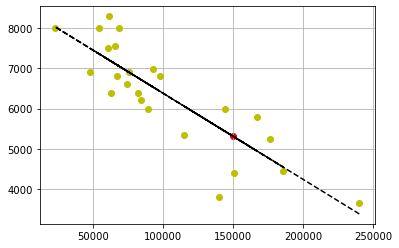

In [6]:
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

df = DataFrame(load_csv())
plt.grid(True)
plt.plot(df[0], df[1], 'yo', df[0], theta1*df[0]+theta0, '--k')
plt.scatter(x_pred, y_pred, color='red')